# Dealing with Missing Values
- Using Pandas library with Mean, Median & Mode
- Using Scikit-learn library
- Usin forward & backward filling

## 1. Dealing with Missing Values using Pandas 
- Mean
- Median
- Mode

***import the Libraries***
- Used to deal with Missing Values

In [33]:
#Import the libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
#Load the Dataset with seaborn:
df = sns.load_dataset('titanic')

In [35]:
#Check the head of dataset:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
#To check the info of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [37]:
#Check the missing values of dataset:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
#Checking the missing values with in order:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [39]:
#To check the total percentage of missing values:
df.isnull().sum().sort_values(ascending=False)/len(df)*100


deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

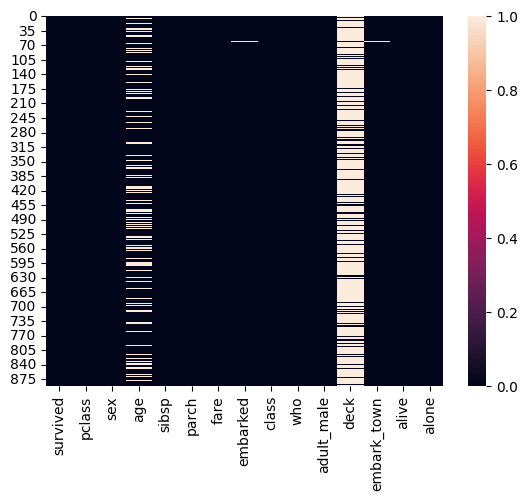

In [40]:
#Make a heatmap plot with seaborn of missing values:
sns.heatmap(df.isnull())
plt.show()

In [41]:
#Import the library for missingno of python:
import missingno as msno

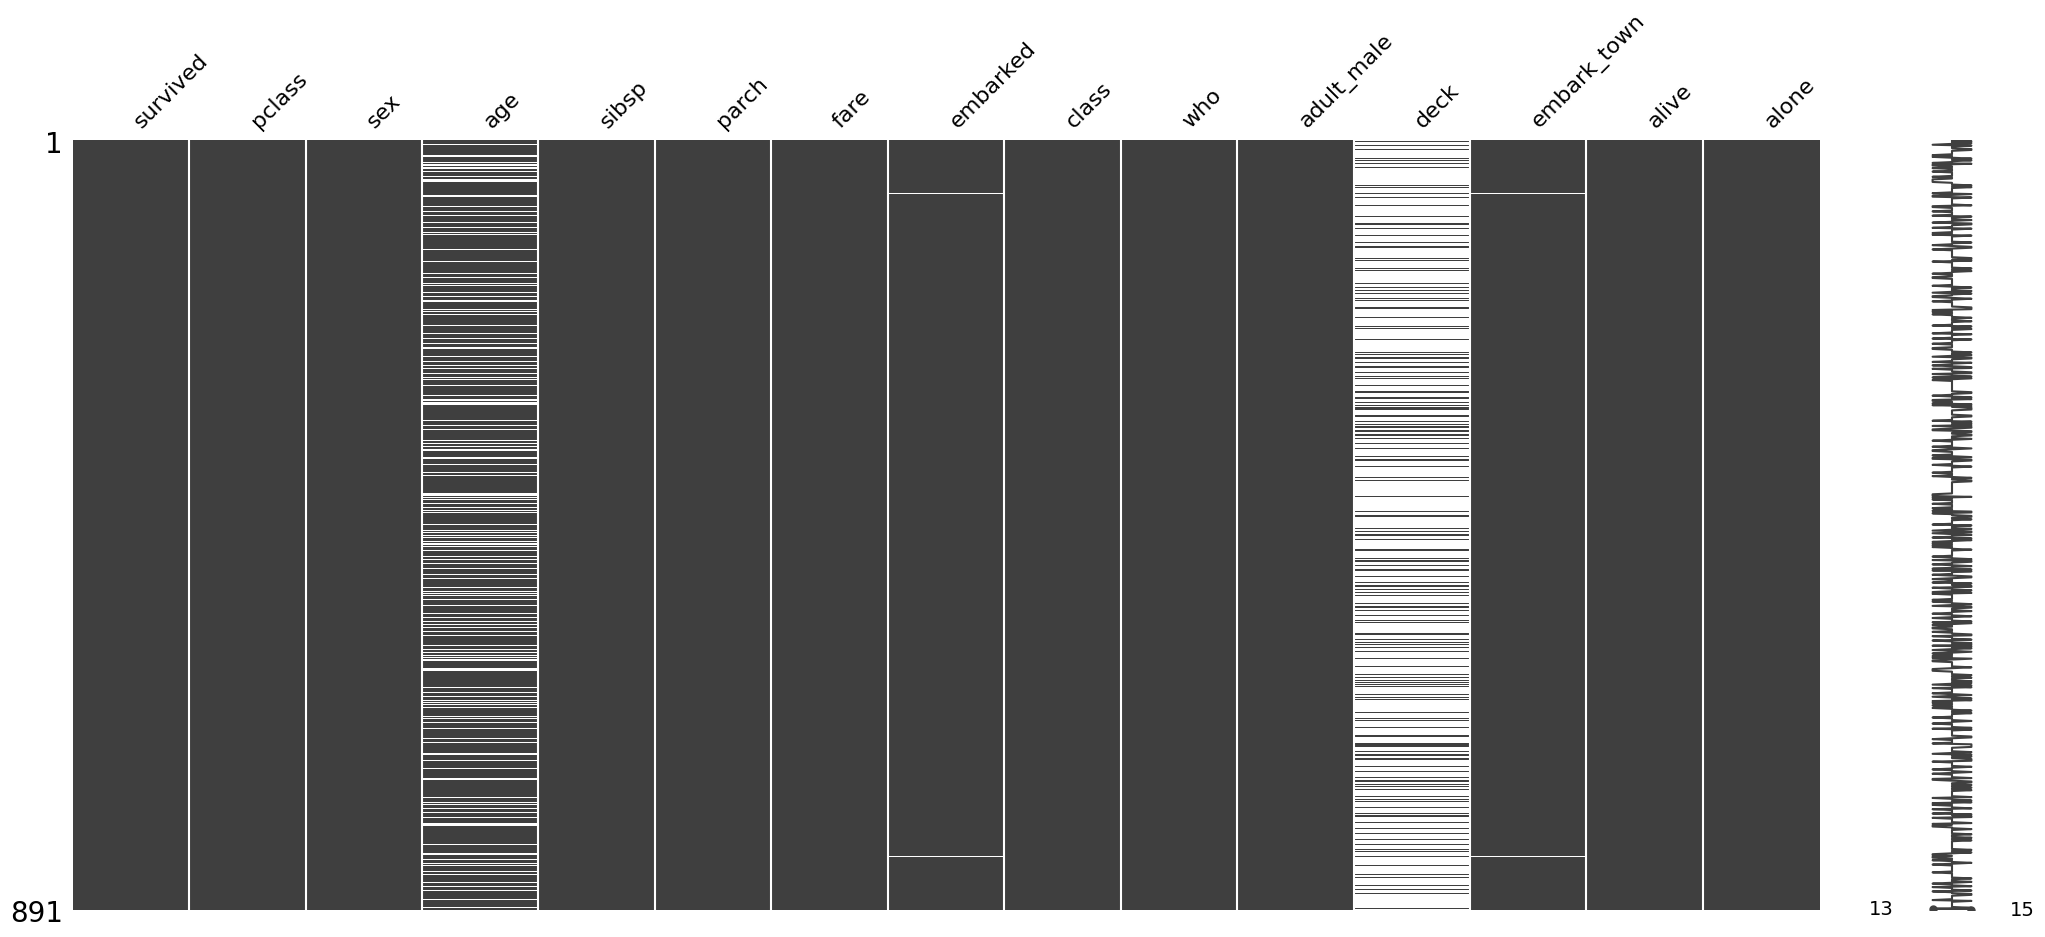

In [42]:
#Plot the missing values:
msno.matrix(df)
plt.show()

In [43]:
#Fill the missing value column of age with median:
df['age'] = df['age'].fillna(df['age'].median()).infer_objects(copy=False)
#Print the column & check the missing values of age column:
df['age'].isnull().sum()

np.int64(0)

In [45]:
#Check the missing values again with order:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [46]:
#Drop the column of high missing values :
df.drop('deck',axis=1,inplace=True)

In [47]:
#Check the dataset again:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [48]:
#Check the missing values again:
df.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

In [52]:
#Dealing the categorical dataset missing value like embark_town with mode:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
#Print the dataset:
df['embark_town']
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [53]:
#Check the null values again:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

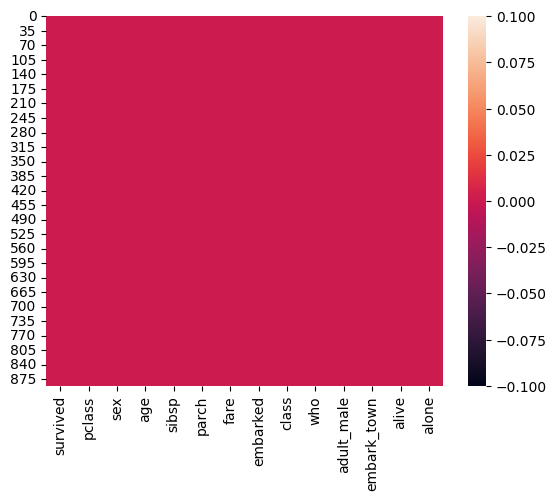

In [54]:
#Make a Heatmap plot of missing values again:
sns.heatmap(df.isnull())
plt.show()

## 2. Dealing with Missing values using Machine Learning Library Scikit-Learn (sklearn)
- Simple Imputer
- Multivariate Imputer 

***Import the Library of Scikit-Learn (sklearn)***

In [55]:
#import sklearn simple imputer library:
from sklearn.impute import SimpleImputer

In [58]:
#Load the Dataset with seaborn:
df = sns.load_dataset('titanic')

In [59]:
#Check the head of dataset:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
#Check the missing values:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [61]:
#Call the Simple Imputer function for Missing values of age column with median:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#Fit the imputer function:
imputer = imputer.fit(df[['age']])

#Transform the imputer function:
df['age'] = imputer.transform(df[['age']])

#Print the Result:
df['age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [62]:
#Check the missing values again:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [64]:
#Import the sklearn experimental:
from sklearn.experimental import enable_iterative_imputer 

In [65]:
#Import the libary of Multivariate imputer:
from sklearn.impute import IterativeImputer

In [69]:
#Use the Maltivariate Imputation Method for dealing with embarked column of dataset:
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df['age'] = imputer.fit_transform(df[['age']])
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

## 3. Forward & Backward Fill Method
- Using Pandas 

***Using Forward Method***

In [70]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Load the titanic dataset with seaborn:
df = sns.load_dataset('titanic')

In [72]:
#Check the head:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
#Check the missing values with order:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [76]:
#Use the forward method to fill the missing values :
df['embark_town'] = df['embark_town'].ffill()


In [78]:
#Also use for embarked:
df['embarked'] = df['embarked'].ffill()

In [79]:
#Check the missing data:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
pclass           0
sex              0
sibsp            0
parch            0
survived         0
fare             0
embarked         0
who              0
class            0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

***Using Backward Method***

In [80]:
#Using backward method for missing values of "age" column:
df['age'] = df['age'].bfill()

In [81]:
#Check the missing values:
df.isnull().sum().sort_values(ascending=False)

deck           688
pclass           0
survived         0
age              0
sibsp            0
parch            0
sex              0
fare             0
embarked         0
who              0
class            0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [82]:
#Drop the highest missing value column:
df.drop('deck',axis=1,inplace=True)

In [83]:
#Check the missing values again:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64